In [1]:
#Importing the necessary libraries
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Activation
import matplotlib.pyplot as plt

In [2]:
#Loading the dataset
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
#Casting the records into float values
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [4]:
#Normalizing image pixel values by dividing by 255
gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale

In [5]:
#Structure of the dataset
print("Feature matrix:",x_train.shape)
print("Target matrix:",x_test.shape)
print("Feature matrix:",y_train.shape)
print("Target matrix:",y_test.shape)

Feature matrix: (60000, 28, 28)
Target matrix: (10000, 28, 28)
Feature matrix: (60000,)
Target matrix: (10000,)


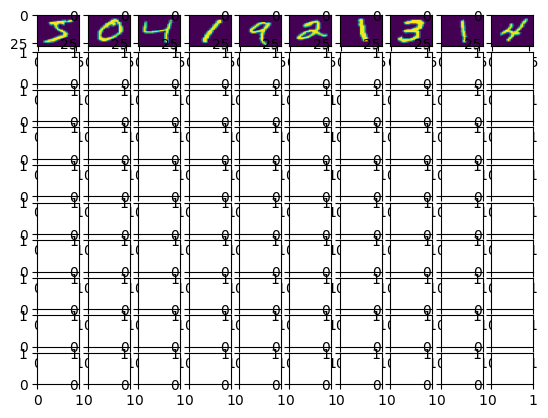

In [7]:
fig, ax = plt.subplots(10,10)
k=0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(x_train[k].reshape(28,28),aspect='auto')
        k += 1
    plt.show()

In [8]:
#Creating the model
model = Sequential([
    #reshape 28 row * 28 column data to 28*28 rows
    Flatten(input_shape=(28,28)),
    
    #dense 1 layer
    Dense(256,activation='sigmoid'),
    
    #dense 2 layer
    Dense(128,activation='sigmoid'),
    
    #output layer
    Dense(10,activation='sigmoid')
])

In [9]:
#Compiling the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [17]:
#Fitting the model
with tf.device("/GPU:0"):
    model.fit(x_train,y_train,epochs=2000,batch_size=2000,validation_split=0.2)

Epoch 1/2000
24/24 [==============================] - 0s 10ms/step - loss: 1.7975e-06 - accuracy: 1.0000 - val_loss: 0.1249 - val_accuracy: 0.9796
Epoch 2/2000
24/24 [==============================] - 0s 8ms/step - loss: 1.7761e-06 - accuracy: 1.0000 - val_loss: 0.1253 - val_accuracy: 0.9795
Epoch 3/2000
24/24 [==============================] - 0s 8ms/step - loss: 1.7653e-06 - accuracy: 1.0000 - val_loss: 0.1255 - val_accuracy: 0.9794
Epoch 4/2000
24/24 [==============================] - 0s 9ms/step - loss: 1.7349e-06 - accuracy: 1.0000 - val_loss: 0.1255 - val_accuracy: 0.9793
Epoch 5/2000
24/24 [==============================] - 0s 8ms/step - loss: 1.7142e-06 - accuracy: 1.0000 - val_loss: 0.1254 - val_accuracy: 0.9795
Epoch 6/2000
24/24 [==============================] - 0s 8ms/step - loss: 1.6959e-06 - accuracy: 1.0000 - val_loss: 0.1256 - val_accuracy: 0.9794
Epoch 7/2000
24/24 [==============================] - 0s 8ms/step - loss: 1.6754e-06 - accuracy: 1.0000 - val_loss: 0.1257 

In [18]:
#Calculating the accuracy
results = model.evaluate(x_test,y_test,verbose=0)
print('test loss, test acc:',results)

test loss, test acc: [0.14640100300312042, 0.9799999594688416]
